In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('datasets\heart_disease_dataset.csv')
df

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,Female,269,111,86,Never,Heavy,5,No,Yes,Yes,10,120,No,Non-anginal Pain,1
996,78,Female,334,145,76,Never,NaN,6,No,No,No,10,196,Yes,Typical Angina,1
997,79,Male,151,179,81,Never,Moderate,4,Yes,No,Yes,8,189,Yes,Asymptomatic,0
998,60,Female,326,151,68,Former,NaN,8,Yes,Yes,No,5,174,Yes,Atypical Angina,1


In [3]:
df.shape

(1000, 16)

In [4]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [5]:
df.isna().sum()

Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64

In [6]:
df['Alcohol Intake'].unique()

array(['Heavy', nan, 'Moderate'], dtype=object)

In [7]:
df['Alcohol Intake']=df['Alcohol Intake'].fillna(df[df['Alcohol Intake'].notna()]['Alcohol Intake'][0])

In [8]:
df.isna().sum()

Age                        0
Gender                     0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Smoking                    0
Alcohol Intake             0
Exercise Hours             0
Family History             0
Diabetes                   0
Obesity                    0
Stress Level               0
Blood Sugar                0
Exercise Induced Angina    0
Chest Pain Type            0
Heart Disease              0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Smoking', 'Alcohol Intake', 'Exercise Hours', 'Family History',
       'Diabetes', 'Obesity', 'Stress Level', 'Blood Sugar',
       'Exercise Induced Angina', 'Chest Pain Type', 'Heart Disease'],
      dtype='object')

In [11]:
cols=['Gender','Smoking','Alcohol Intake','Family History','Diabetes','Obesity','Exercise Induced Angina','Chest Pain Type']
for col in cols:
    print(f"{col} has unique value has {df[col].unique()}")

Gender has unique value has ['Female' 'Male']
Smoking has unique value has ['Current' 'Never' 'Former']
Alcohol Intake has unique value has ['Heavy' 'Moderate']
Family History has unique value has ['No' 'Yes']
Diabetes has unique value has ['No' 'Yes']
Obesity has unique value has ['Yes' 'No']
Exercise Induced Angina has unique value has ['Yes' 'No']
Chest Pain Type has unique value has ['Atypical Angina' 'Typical Angina' 'Non-anginal Pain' 'Asymptomatic']


In [12]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})


In [13]:
df['Alcohol Intake']=df['Alcohol Intake'].map({'Heavy':1,'Moderate':0})


In [14]:
df['Family History']=df['Family History'].map({'Yes':1,'No':0})


In [15]:
df['Diabetes']=df['Diabetes'].map({'Yes':1,'No':0})


In [16]:
df['Obesity']=df['Obesity'].map({'Yes':1,'No':0})


In [17]:
df['Exercise Induced Angina']=df['Exercise Induced Angina'].map({'Yes':1,'No':0})


In [18]:

Chest_Pain=df['Chest Pain Type']
Chest_Pain

0       Atypical Angina
1        Typical Angina
2       Atypical Angina
3      Non-anginal Pain
4          Asymptomatic
             ...       
995    Non-anginal Pain
996      Typical Angina
997        Asymptomatic
998     Atypical Angina
999        Asymptomatic
Name: Chest Pain Type, Length: 1000, dtype: object

In [19]:
cols=['Smoking','Chest Pain Type']

df_dummy=pd.get_dummies(df[cols],drop_first=True,dtype=int)
df.drop(cols,axis=1,inplace=True)
df=pd.concat([df,df_dummy],axis=1)

In [20]:
df_dummy

,Smoking_Former,Smoking_Never,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina
0,0,0,1,0,0
1,0,0,0,0,1
2,0,1,1,0,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
995,0,1,0,1,0
996,0,1,0,0,1
997,0,1,0,0,0
998,1,0,1,0,0


In [21]:
df

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Heart Disease,Smoking_Former,Smoking_Never,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina
0,75,0,228,119,66,1,1,0,0,1,8,119,1,1,0,0,1,0,0
1,48,1,204,165,62,1,5,0,0,0,9,70,1,0,0,0,0,0,1
2,53,1,234,91,67,1,3,1,0,1,5,196,1,1,0,1,1,0,0
3,69,0,192,90,72,1,4,0,1,0,7,107,1,0,0,0,0,1,0
4,62,0,172,163,93,1,6,0,1,0,2,183,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,0,269,111,86,1,5,0,1,1,10,120,0,1,0,1,0,1,0
996,78,0,334,145,76,1,6,0,0,0,10,196,1,1,0,1,0,0,1
997,79,1,151,179,81,0,4,1,0,1,8,189,1,0,0,1,0,0,0
998,60,0,326,151,68,1,8,1,1,0,5,174,1,1,1,0,1,0,0


In [22]:
df.dtypes

Age                                 int64
Gender                              int64
Cholesterol                         int64
Blood Pressure                      int64
Heart Rate                          int64
Alcohol Intake                      int64
Exercise Hours                      int64
Family History                      int64
Diabetes                            int64
Obesity                             int64
Stress Level                        int64
Blood Sugar                         int64
Exercise Induced Angina             int64
Heart Disease                       int64
Smoking_Former                      int32
Smoking_Never                       int32
Chest Pain Type_Atypical Angina     int32
Chest Pain Type_Non-anginal Pain    int32
Chest Pain Type_Typical Angina      int32
dtype: object

<Axes: >

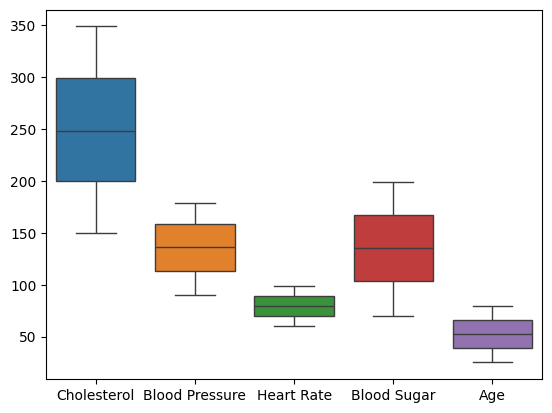

In [60]:
cols=['Cholesterol','Blood Pressure','Heart Rate','Blood Sugar','Age']
sns.boxplot(df[cols])
# Insights No Outliers

In [24]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Heart Disease,Smoking_Former,Smoking_Never,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina
0,75,0,228,119,66,1,1,0,0,1,8,119,1,1,0,0,1,0,0
1,48,1,204,165,62,1,5,0,0,0,9,70,1,0,0,0,0,0,1
2,53,1,234,91,67,1,3,1,0,1,5,196,1,1,0,1,1,0,0
3,69,0,192,90,72,1,4,0,1,0,7,107,1,0,0,0,0,1,0
4,62,0,172,163,93,1,6,0,1,0,2,183,1,0,0,1,0,0,0


In [25]:
x=df.drop('Heart Disease',axis=1)
y=df['Heart Disease']
x

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Smoking_Former,Smoking_Never,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina
0,75,0,228,119,66,1,1,0,0,1,8,119,1,0,0,1,0,0
1,48,1,204,165,62,1,5,0,0,0,9,70,1,0,0,0,0,1
2,53,1,234,91,67,1,3,1,0,1,5,196,1,0,1,1,0,0
3,69,0,192,90,72,1,4,0,1,0,7,107,1,0,0,0,1,0
4,62,0,172,163,93,1,6,0,1,0,2,183,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,0,269,111,86,1,5,0,1,1,10,120,0,0,1,0,1,0
996,78,0,334,145,76,1,6,0,0,0,10,196,1,0,1,0,0,1
997,79,1,151,179,81,0,4,1,0,1,8,189,1,0,1,0,0,0
998,60,0,326,151,68,1,8,1,1,0,5,174,1,1,0,1,0,0


In [26]:
y

0      1
1      0
2      1
3      0
4      0
      ..
995    1
996    1
997    0
998    1
999    1
Name: Heart Disease, Length: 1000, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train.shape,x_test.shape


((700, 18), (300, 18))

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
y_pred


array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1], d

In [30]:
log_reg.predict_proba(x_test)

array([[1.38965598e-02, 9.86103440e-01],
       [9.95157178e-01, 4.84282167e-03],
       [7.91076242e-01, 2.08923758e-01],
       [9.33763925e-03, 9.90662361e-01],
       [9.85537712e-01, 1.44622876e-02],
       [1.07995782e-01, 8.92004218e-01],
       [2.04244349e-03, 9.97957557e-01],
       [4.73742459e-02, 9.52625754e-01],
       [1.21740718e-01, 8.78259282e-01],
       [8.43447510e-01, 1.56552490e-01],
       [1.21391239e-02, 9.87860876e-01],
       [9.98159688e-01, 1.84031216e-03],
       [2.17793242e-01, 7.82206758e-01],
       [7.54268258e-01, 2.45731742e-01],
       [9.01339057e-01, 9.86609429e-02],
       [9.92333081e-01, 7.66691931e-03],
       [3.89945506e-02, 9.61005449e-01],
       [6.75039065e-01, 3.24960935e-01],
       [1.38718772e-03, 9.98612812e-01],
       [9.85327118e-01, 1.46728824e-02],
       [7.16905883e-01, 2.83094117e-01],
       [9.61926545e-01, 3.80734548e-02],
       [3.94926920e-01, 6.05073080e-01],
       [6.25548494e-01, 3.74451506e-01],
       [9.964356

In [31]:
#Evaluation Metruces Logistic Regression 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8366666666666667

In [32]:

from sklearn.metrics import roc_curve,auc
y_pred_proba=log_reg.predict_proba(x_test)[:,1]
y_pred_proba

array([9.86103440e-01, 4.84282167e-03, 2.08923758e-01, 9.90662361e-01,
       1.44622876e-02, 8.92004218e-01, 9.97957557e-01, 9.52625754e-01,
       8.78259282e-01, 1.56552490e-01, 9.87860876e-01, 1.84031216e-03,
       7.82206758e-01, 2.45731742e-01, 9.86609429e-02, 7.66691931e-03,
       9.61005449e-01, 3.24960935e-01, 9.98612812e-01, 1.46728824e-02,
       2.83094117e-01, 3.80734548e-02, 6.05073080e-01, 3.74451506e-01,
       3.56436935e-03, 2.57633914e-01, 1.42097063e-01, 1.17968269e-03,
       3.84802545e-02, 9.96748731e-01, 1.82580699e-01, 1.37433803e-03,
       8.07404944e-01, 2.74283004e-02, 2.30300541e-01, 7.02581394e-01,
       2.12480389e-01, 7.86056361e-05, 1.44691840e-02, 7.29440306e-02,
       7.76015862e-01, 9.92049165e-01, 5.98676785e-02, 3.14427712e-01,
       6.82941068e-02, 9.96289858e-01, 3.83208976e-01, 3.25262148e-01,
       9.91238461e-01, 5.17750623e-01, 9.94152657e-01, 4.59568003e-03,
       1.16936505e-02, 4.94589493e-01, 5.76839378e-01, 9.90773707e-01,
      

In [33]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
fpr

array([0.        , 0.        , 0.        , 0.00571429, 0.00571429,
       0.01714286, 0.01714286, 0.02285714, 0.02285714, 0.03428571,
       0.03428571, 0.04      , 0.04      , 0.04571429, 0.04571429,
       0.07428571, 0.07428571, 0.08      , 0.08      , 0.09714286,
       0.09714286, 0.10285714, 0.10285714, 0.10857143, 0.10857143,
       0.11428571, 0.11428571, 0.12      , 0.12      , 0.14285714,
       0.14285714, 0.15428571, 0.15428571, 0.16      , 0.16      ,
       0.17142857, 0.17142857, 0.18857143, 0.18857143, 0.23428571,
       0.23428571, 0.28      , 0.28      , 0.29142857, 0.29142857,
       0.31428571, 0.31428571, 0.34285714, 0.34285714, 0.37714286,
       0.37714286, 0.41714286, 0.41714286, 0.43428571, 0.43428571,
       0.44571429, 0.44571429, 1.        ])

In [34]:
tpr

array([0.   , 0.008, 0.568, 0.568, 0.608, 0.608, 0.624, 0.624, 0.632,
       0.632, 0.64 , 0.64 , 0.648, 0.648, 0.664, 0.664, 0.712, 0.712,
       0.72 , 0.72 , 0.752, 0.752, 0.76 , 0.76 , 0.792, 0.792, 0.8  ,
       0.8  , 0.848, 0.848, 0.856, 0.856, 0.88 , 0.88 , 0.888, 0.888,
       0.896, 0.896, 0.912, 0.912, 0.92 , 0.92 , 0.936, 0.936, 0.944,
       0.944, 0.952, 0.952, 0.96 , 0.96 , 0.968, 0.968, 0.984, 0.984,
       0.992, 0.992, 1.   , 1.   ])

In [35]:
thresholds

array([           inf, 9.98648188e-01, 8.05935661e-01, 8.02541871e-01,
       7.76015862e-01, 7.72534296e-01, 7.48310189e-01, 7.40217201e-01,
       7.37718491e-01, 7.20237415e-01, 7.14496037e-01, 7.02581394e-01,
       6.87514785e-01, 6.84924228e-01, 6.59237573e-01, 6.40174864e-01,
       5.96844404e-01, 5.81533280e-01, 5.76839378e-01, 5.40113521e-01,
       5.01571525e-01, 5.00641528e-01, 4.94589493e-01, 4.92692799e-01,
       4.86827168e-01, 4.75112562e-01, 4.47784124e-01, 4.43825217e-01,
       3.83208976e-01, 3.50565313e-01, 3.46080011e-01, 3.25262148e-01,
       3.14976703e-01, 3.14584238e-01, 3.14427712e-01, 3.00703912e-01,
       2.86103075e-01, 2.57633914e-01, 2.51762944e-01, 2.21400750e-01,
       2.16068738e-01, 1.82509186e-01, 1.69934769e-01, 1.56552490e-01,
       1.55932070e-01, 1.35213868e-01, 1.28911301e-01, 1.02044003e-01,
       9.86609429e-02, 7.69555991e-02, 7.58116252e-02, 6.24371657e-02,
       5.98676785e-02, 5.26486793e-02, 5.23033276e-02, 5.10174423e-02,
      

In [36]:
#Calculate auc score 
roc_auc=auc(fpr,tpr)
roc_auc

0.9385142857142857

In [37]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid={'penalty':['l1','l2','elasticnet'],'C':[1,2,10,20,30,40]}

grid_seach=GridSearchCV(log_reg,param_grid=param_grid,cv=5,verbose=3)
grid_seach.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.879 total time=   0.0s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.893 total time=   0.0s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.850 total time=   0.0s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.886 total time=   0.0s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.821 total time=   0.0s
[CV 1/5] END .............C=1, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END .............C=1, penalty=elasticne

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 10, 20, 30, 40],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=3)

In [38]:
grid_seach.best_params_

{'C': 1, 'penalty': 'l2'}

In [39]:
best_model=grid_seach.best_estimator_
best_model

LogisticRegression(C=1)

In [40]:
y_pred_tuned=best_model.predict(x_test)
y_pred_tuned

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1], d

In [61]:
accuracy_score(y_test,y_pred_tuned)

0.26666666666666666

In [42]:
df.columns

Index(['Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Alcohol Intake', 'Exercise Hours', 'Family History', 'Diabetes',
       'Obesity', 'Stress Level', 'Blood Sugar', 'Exercise Induced Angina',
       'Heart Disease', 'Smoking_Former', 'Smoking_Never',
       'Chest Pain Type_Atypical Angina', 'Chest Pain Type_Non-anginal Pain',
       'Chest Pain Type_Typical Angina'],
      dtype='object')

In [43]:
#Multiclass Logistic Regression
col=['Chest Pain Type_Atypical Angina','Chest Pain Type_Non-anginal Pain','Chest Pain Type_Typical Angina']
df.drop(col,axis=1,inplace=True)



In [44]:
s=pd.Series(Chest_Pain,name='Chest_Pain_Type')
df_copy=s.to_frame()
df_copy



,Chest_Pain_Type
0,Atypical Angina
1,Typical Angina
2,Atypical Angina
3,Non-anginal Pain
4,Asymptomatic
...,...
995,Non-anginal Pain
996,Typical Angina
997,Asymptomatic
998,Atypical Angina


In [45]:
df=pd.concat([df,df_copy],axis=1)
df

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Heart Disease,Smoking_Former,Smoking_Never,Chest_Pain_Type
0,75,0,228,119,66,1,1,0,0,1,8,119,1,1,0,0,Atypical Angina
1,48,1,204,165,62,1,5,0,0,0,9,70,1,0,0,0,Typical Angina
2,53,1,234,91,67,1,3,1,0,1,5,196,1,1,0,1,Atypical Angina
3,69,0,192,90,72,1,4,0,1,0,7,107,1,0,0,0,Non-anginal Pain
4,62,0,172,163,93,1,6,0,1,0,2,183,1,0,0,1,Asymptomatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,0,269,111,86,1,5,0,1,1,10,120,0,1,0,1,Non-anginal Pain
996,78,0,334,145,76,1,6,0,0,0,10,196,1,1,0,1,Typical Angina
997,79,1,151,179,81,0,4,1,0,1,8,189,1,0,0,1,Asymptomatic
998,60,0,326,151,68,1,8,1,1,0,5,174,1,1,1,0,Atypical Angina


In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Chest_Pain_Type']=le.fit_transform(df['Chest_Pain_Type'])
df

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Heart Disease,Smoking_Former,Smoking_Never,Chest_Pain_Type
0,75,0,228,119,66,1,1,0,0,1,8,119,1,1,0,0,1
1,48,1,204,165,62,1,5,0,0,0,9,70,1,0,0,0,3
2,53,1,234,91,67,1,3,1,0,1,5,196,1,1,0,1,1
3,69,0,192,90,72,1,4,0,1,0,7,107,1,0,0,0,2
4,62,0,172,163,93,1,6,0,1,0,2,183,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,0,269,111,86,1,5,0,1,1,10,120,0,1,0,1,2
996,78,0,334,145,76,1,6,0,0,0,10,196,1,1,0,1,3
997,79,1,151,179,81,0,4,1,0,1,8,189,1,0,0,1,0
998,60,0,326,151,68,1,8,1,1,0,5,174,1,1,1,0,1


In [47]:
x=df.drop('Chest_Pain_Type',axis=1)
y=df['Chest_Pain_Type']
x

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Heart Disease,Smoking_Former,Smoking_Never
0,75,0,228,119,66,1,1,0,0,1,8,119,1,1,0,0
1,48,1,204,165,62,1,5,0,0,0,9,70,1,0,0,0
2,53,1,234,91,67,1,3,1,0,1,5,196,1,1,0,1
3,69,0,192,90,72,1,4,0,1,0,7,107,1,0,0,0
4,62,0,172,163,93,1,6,0,1,0,2,183,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,0,269,111,86,1,5,0,1,1,10,120,0,1,0,1
996,78,0,334,145,76,1,6,0,0,0,10,196,1,1,0,1
997,79,1,151,179,81,0,4,1,0,1,8,189,1,0,0,1
998,60,0,326,151,68,1,8,1,1,0,5,174,1,1,1,0


In [48]:
y

0      1
1      3
2      1
3      2
4      0
      ..
995    2
996    3
997    0
998    1
999    0
Name: Chest_Pain_Type, Length: 1000, dtype: int32

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
x_train.shape,x_test.shape

((670, 16), (330, 16))

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [51]:
from sklearn.decomposition import PCA
pca=PCA()
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [52]:
#One Vs Rest
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(multi_class='ovr',solver='lbfgs')
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
y_pred


array([3, 2, 3, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 3, 1, 0, 0, 1, 0, 1, 0, 0,
       2, 2, 1, 1, 1, 3, 3, 3, 0, 2, 0, 1, 0, 1, 1, 2, 2, 3, 0, 3, 1, 1,
       1, 3, 0, 2, 0, 0, 3, 2, 2, 3, 3, 0, 0, 0, 2, 3, 1, 0, 2, 0, 3, 3,
       1, 2, 3, 0, 0, 2, 3, 2, 2, 1, 1, 3, 1, 0, 2, 3, 1, 3, 1, 2, 2, 3,
       0, 2, 2, 2, 0, 3, 2, 0, 3, 3, 2, 2, 2, 2, 3, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 1, 3, 1, 1, 1, 3, 1, 2, 2, 0, 2, 0, 0, 2, 2, 3, 0, 2, 1, 2,
       0, 2, 2, 1, 2, 0, 2, 2, 1, 3, 0, 3, 1, 1, 3, 0, 3, 2, 2, 3, 0, 3,
       0, 1, 0, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 3, 0, 3, 1, 0, 1,
       0, 2, 1, 0, 1, 1, 2, 3, 1, 3, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2,
       0, 1, 2, 3, 1, 0, 0, 2, 1, 3, 0, 1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 0,
       2, 0, 2, 3, 2, 3, 0, 0, 3, 2, 1, 0, 3, 2, 0, 0, 2, 0, 1, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 3, 3, 0, 0, 0, 0, 2, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 2, 3, 0, 2, 0, 0, 3, 1, 2, 1, 1, 1, 0, 0,
       2, 2, 3, 2, 0, 2, 1, 1, 2, 1, 3, 3, 0, 0, 2,

In [53]:
#Evaluation Metruces  Multiclass Logistic Regression 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.26666666666666666

In [54]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid={'penalty':['l1','l2','elasticnet'],'C':[1,2,10,20,30,40]}

grid_seach=GridSearchCV(log_reg,param_grid=param_grid,cv=5,verbose=3)
grid_seach.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.246 total time=   0.0s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.336 total time=   0.0s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.201 total time=   0.0s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.246 total time=   0.0s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.321 total time=   0.0s
[CV 1/5] END .............C=1, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END .............C=1, penalty=elasticne

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': [1, 2, 10, 20, 30, 40],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=3)

In [55]:
best_model=grid_seach.best_estimator_
y_pred_tuned=best_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.26666666666666666

In [56]:
#Multinomial
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(multi_class='multinomial',solver='lbfgs')
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
y_pred

array([3, 2, 3, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 3, 1, 0, 0, 1, 0, 1, 0, 0,
       2, 2, 1, 1, 1, 3, 3, 3, 0, 2, 0, 1, 0, 1, 1, 2, 2, 3, 0, 3, 1, 1,
       1, 3, 0, 2, 0, 0, 3, 2, 2, 3, 3, 0, 0, 0, 2, 3, 1, 0, 2, 0, 3, 3,
       1, 2, 3, 0, 0, 2, 3, 2, 2, 1, 1, 3, 1, 0, 2, 3, 1, 3, 1, 2, 2, 3,
       0, 2, 2, 2, 0, 3, 2, 0, 3, 3, 2, 2, 2, 2, 3, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 1, 3, 1, 1, 1, 3, 1, 2, 2, 0, 2, 0, 0, 2, 2, 3, 0, 2, 1, 2,
       0, 2, 2, 1, 2, 0, 2, 2, 1, 3, 0, 3, 1, 1, 3, 0, 3, 2, 2, 3, 0, 3,
       0, 1, 0, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 3, 0, 3, 1, 0, 1,
       0, 2, 1, 0, 1, 1, 2, 3, 1, 3, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2,
       0, 1, 2, 3, 1, 0, 0, 2, 1, 3, 0, 1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 0,
       2, 0, 2, 3, 2, 3, 0, 0, 3, 2, 1, 0, 3, 2, 0, 0, 2, 0, 1, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 3, 3, 0, 0, 0, 0, 2, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 2, 3, 0, 2, 0, 0, 3, 1, 2, 1, 1, 1, 0, 0,
       2, 2, 3, 2, 0, 2, 1, 1, 2, 1, 3, 3, 0, 0, 2,

In [57]:
accuracy_score(y_test,y_pred)

0.26666666666666666

In [58]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid={'penalty':['l1','l2','elasticnet'],'C':[1,2,10,20,30,40]}

grid_seach=GridSearchCV(log_reg,param_grid=param_grid,cv=5,verbose=3)
grid_seach.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.246 total time=   0.0s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.336 total time=   0.0s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.209 total time=   0.0s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.254 total time=   0.0s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.321 total time=   0.0s
[CV 1/5] END .............C=1, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END .............C=1, penalty=elasticne

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [1, 2, 10, 20, 30, 40],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=3)

In [59]:
best_model=grid_seach.best_estimator_
y_pred_tuned=best_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.26666666666666666